# 패키지

In [1]:
import nltk
!pip install wordcloud
!pip install nltk
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\student\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#!pip3 install konlpy
!pip install wordcloud
!pip install nltk
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from wordcloud import WordCloud
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics import pairwise_distances
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from pylab import plot, show, legend, title, xlabel, ylabel
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from nltk.corpus import words
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\student\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 유튜브 데이터 불러오기

In [3]:
os.chdir(r'C:\Users\student\Desktop\모델링')

#final_youtube_comment = pd.read_csv('fin_0515_comment.csv')
final_youtube_comment = pd.read_excel('yt_com (1).xlsx', sheet_name = 'Sheet1')
#googletrend = pd.read_excel('이니스프리_구글트랜드.xlsx', sheet_name = 'fin')
youtube_comment = final_youtube_comment.copy()

final_youtube_comment.shape

(45591, 6)

In [4]:
final_youtube_comment

,link,comment,video date,date,year,month
0,https://www.youtube.com/watch?v=9q0V_Z8ERVg,언니 영상에 구석구석 나오는 방이 너무 예뻐요! 방소개영상도 볼수있었으면 좋겠어요 🖤🙏🏼,2019-05-10,2019-05-12,2019,5
1,https://www.youtube.com/watch?v=9q0V_Z8ERVg,오프닝 앤티앤스 부터 심멎.... 크림치즈아몬드 먹구시포요...... 일리윤 리무버...,2019-05-10,2019-05-11,2019,5
2,https://www.youtube.com/watch?v=9q0V_Z8ERVg,언니 저 댓글처음다는데 언니영상꾸준히보구잇어요 너무이쁘시구❤️ 영상도 너무재밋어요 ...,2019-05-10,2019-05-13,2019,5
3,https://www.youtube.com/watch?v=9q0V_Z8ERVg,새영님 해면스펀지 정보도 알려주실수 있나용!!??🥺🙏🏻,2019-05-10,2019-05-11,2019,5
4,https://www.youtube.com/watch?v=9q0V_Z8ERVg,몸매 예뻐요!,2019-05-10,2019-05-12,2019,5
5,https://www.youtube.com/watch?v=9q0V_Z8ERVg,꺄 새영님💞 본격적으로 하시기 전에 박수치시는거 넘나 기여워여>< 영상 오래오래 올...,2019-05-10,2019-05-11,2019,5
6,https://www.youtube.com/watch?v=9q0V_Z8ERVg,학교도 그렇게 이쁘게 해서 가면 어떡하나요😉😉💙💙,2019-05-10,2019-05-11,2019,5
7,https://www.youtube.com/watch?v=9q0V_Z8ERVg,앗싸 새영님 영상 1빠... ❤️ 오랜만에 댓글 다는거 같은데 항상 잘보구있어용 >...,2019-05-10,2019-05-11,2019,5
8,https://www.youtube.com/watch?v=9q0V_Z8ERVg,귀여워이ㅠㅠㅠ 전 얼빠가 확실합니다...❤️😊,2019-05-10,2019-05-13,2019,5
9,https://www.youtube.com/watch?v=9q0V_Z8ERVg,처음입고나온 아우터랑 원피스궁금해요,2019-05-10,2019-05-11,2019,5


In [5]:
# 한글처리된거 먼저 제거
youtube_korean_comment = final_youtube_comment['comment'].apply(lambda x: re.sub('[^가-힣]',' ',str(x)).strip())
final_youtube_comment = youtube_comment.loc[youtube_korean_comment[youtube_korean_comment.str.len()== 0].index]

final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: str(x).lower())

# 영어만 남기기. 특수문자 제거
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('[^a-zA-Z0-9@]',' ',str(x)).strip())

# 날짜 yyyymmdd 형태로 변환
#final_youtube_comment['comment date'] = final_youtube_comment['comment date'].apply(lambda x: datetime.strptime("/".join(re.findall('\d+', x)), '%Y/%m/%d').strftime('%Y%m%d'))
#final_youtube_comment['yyyy'] = final_youtube_comment['comment date'].apply(lambda x: x[0:4])
#final_youtube_comment['mm']   = final_youtube_comment['comment date'].apply(lambda x: x[4:6])

# 분기 추가
#final_youtube_comment['quarter'] = final_youtube_comment['mm'].apply(lambda x: ((int(x)-1)//3 + 1))

In [6]:
# 3글자 이상인 것만 남기기
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('vnd|status|share|com|via|aku|photo|link|http|https|jpg|twitter|jpg|instagram|www|weibo|the|posts','', str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('pemenang|untunk|orang|poem|lake|isle','', str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('caixukun|chenlinong|fanchengcheng','', str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('rt|dm','', str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('/s+',' ', str(x)))

In [7]:
# 비슷한 의미의 단어들 한 단어로 통일시키기
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lee minho|lee min ho|actorleeminho|minoz','leeminho',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('yoon a','yoona',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('wanna one|wan na one','wannaone',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('cleaning|cleanser','cleansing',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('creaming|creams','cream',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('handscream','handcream',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('packs','pack',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('baga','',str(x)))

In [8]:
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('posters','poster',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('kits','kit',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('reviews','review',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('videos','video',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('joankeem','joan',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('from|with|this|that','',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('alwaysleeminho','',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('give away','giveaway',str(x)))

In [9]:
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('bihday','birthday',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('vein','',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('leg','',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lip balm','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lip balms','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lipbalms','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lipbalm','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lipstick','lip',str(x)))

In [10]:
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lip concealer','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lip cheek','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lip cream','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lipcream','lip',str(x)))

In [11]:
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lip tint','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('liptint','lip',str(x) ))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lipgloss','lip',str(x)))

In [12]:
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lips','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lipglow','lip',str(x)))   
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lipstik','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lip glow','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('no sebum','nosebum',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('girls generation|girlsgeneration','snsd',str(x)))

## 이상 키워드 확인

In [13]:
baddrop=['https://www.youtube.com/watch?v=w5QqwN-3pcw',
 'https://www.youtube.com/watch?v=hGoaQ433wnw',
 'https://www.youtube.com/watch?v=GRVW3-INmZ0',
 'https://www.youtube.com/watch?v=oyfB_fvnJ2g',
 'https://www.youtube.com/watch?v=-A5hbpB94LA',
 'https://www.youtube.com/watch?v=QXXVY3lO0SI',
 'https://www.youtube.com/watch?v=z4bfiTR2kBA',
 'https://www.youtube.com/watch?v=mhD3SZYjXdE',
 'https://www.youtube.com/watch?v=W5bPoWtBWmQ',
 'https://www.youtube.com/watch?v=tRaY5q4CaPQ',
 'https://www.youtube.com/watch?v=hjaWBWAGyRw',
 'https://www.youtube.com/watch?v=bK2_i7c_Jk0',
 'https://www.youtube.com/watch?v=qgXJ5tyP5ZA',
 'https://www.youtube.com/watch?v=picpoe_7yck',
 'https://www.youtube.com/watch?v=RfYGF7PkhhE',
 'https://www.youtube.com/watch?v=K-Yn6TezmYQ',
 'https://www.youtube.com/watch?v=Qy5qjWrN6TQ',
 'https://www.youtube.com/watch?v=w7rYE_PMWVg',
 'https://www.youtube.com/watch?v=TfDsVB8fuYI',
 'https://www.youtube.com/watch?v=dZHp5DIzXQk',
 'https://www.youtube.com/watch?v=v3kK2vpEo0M',
 'https://www.youtube.com/watch?v=wNZCWLOFnUg',
 'https://www.youtube.com/watch?v=-PQb-h6lI48',
 'https://www.youtube.com/watch?v=2dMPz8UHhwg',
 'https://www.youtube.com/watch?v=NQSdJHKVbxU',
 'https://www.youtube.com/watch?v=1xn7rjlOxfc',
 'https://www.youtube.com/watch?v=IR4ZeeqC8YY',
 'https://www.youtube.com/watch?v=gT75gKtN2MM',
 'https://www.youtube.com/watch?v=gqFhQFgClNY',
 'https://www.youtube.com/watch?v=3oLnVj953yg',
 'https://www.youtube.com/watch?v=y27ktWMR1ms',
 'https://www.youtube.com/watch?v=qWYzDdEH8Q8',
 'https://www.youtube.com/watch?v=6ICrEjKf8SQ',
 'https://www.youtube.com/watch?v=JOJA0tia66E',
 'https://www.youtube.com/watch?v=bPI8o6RvmQs',
 'https://www.youtube.com/watch?v=lh_aO4lT7IU',
 'https://www.youtube.com/watch?v=LHMEqppr-Bw',
 'https://www.youtube.com/watch?v=Lyz0aw4ySE8',
 'https://www.youtube.com/watch?v=xsN_F3nIQcA',
 'https://www.youtube.com/watch?v=YsvW3bI-83U',
 'https://www.youtube.com/watch?v=rlWBrDX3rPs',
 'https://www.youtube.com/watch?v=L3e2Vy4ssTY',
 'https://www.youtube.com/watch?v=vMzz68hCiNQ',
 'https://www.youtube.com/watch?v=bGPIhN1Z9GA',
 'https://www.youtube.com/watch?v=l33XEjckugQ',
 'https://www.youtube.com/watch?v=djKAnP2wU3M',
 'https://www.youtube.com/watch?v=dllHsQIDlOk',
 'https://www.youtube.com/watch?v=qXepD6mezqI',
 'https://www.youtube.com/watch?v=aKghT5r-oMo',
 'https://www.youtube.com/watch?v=wrlH-tWppds',
 'https://www.youtube.com/watch?v=yTgW4kH4OYA',
 'https://www.youtube.com/watch?v=xi9WQVdunhc',
 'https://www.youtube.com/watch?v=1oooZU3qZvs',
 'https://www.youtube.com/watch?v=IN_PKv35Wug',
 'https://www.youtube.com/watch?v=Te2LFHnEkPA',
 'https://www.youtube.com/watch?v=TleIuj9xIYE',
 'https://www.youtube.com/watch?v=ZsEdoHRgV9c',
 'https://www.youtube.com/watch?v=-klUcRlKTjw',
 'https://www.youtube.com/watch?v=fTWcPQv7MTg',
 'https://www.youtube.com/watch?v=ByZg_FM172w',
 'https://www.youtube.com/watch?v=-bJkKevvslY',
 'https://www.youtube.com/watch?v=OJpePhubQxk',
 'https://www.youtube.com/watch?v=_r40oolveTM',
 'https://www.youtube.com/watch?v=4ptVEZ0vEEE',
 'https://www.youtube.com/watch?v=THlygtNRuOY',
 'https://www.youtube.com/watch?v=NDe7OpWAyg0',
 'https://www.youtube.com/watch?v=_BxOd-XDd9g',
 'https://www.youtube.com/watch?v=BNrWr317CPg',
 'https://www.youtube.com/watch?v=QLlcvQg9i6c',
 'https://www.youtube.com/watch?v=Q2szIu8whCM',
 'https://www.youtube.com/watch?v=jALHv0qmTDQ',
 'https://www.youtube.com/watch?v=Zd-XqF2LXgU',
 'https://www.youtube.com/watch?v=rqOQ5WMGQiI',
 'https://www.youtube.com/watch?v=RRUcBr1tjwM',
 'https://www.youtube.com/watch?v=77mwTX1nW5E',
 'https://www.youtube.com/watch?v=5QerxpC-5Qg',
 'https://www.youtube.com/watch?v=l9YykzLSukw',
 'https://www.youtube.com/watch?v=sHnuo23mRWY',
 'https://www.youtube.com/watch?v=MZwiDPfu1nE',
 'https://www.youtube.com/watch?v=lt2Qbl9wgtc',
 'https://www.youtube.com/watch?v=So6kgO-ZXh4',
 'https://www.youtube.com/watch?v=QkZxoko_HC0',
 'https://www.youtube.com/watch?v=ypg6c-RJCak',
 'https://www.youtube.com/watch?v=G7o9PdcKB94',
 'https://www.youtube.com/watch?v=CGCJbCj-xN8',
 'https://www.youtube.com/watch?v=7QgXYfAGQMg',
 'https://www.youtube.com/watch?v=h8SMRpE_6bg']

In [14]:
# 동영상 제거
for x in final_youtube_comment.index.values:
    if(final_youtube_comment.loc[x].link in baddrop):
        final_youtube_comment = final_youtube_comment.drop(x)

In [15]:
stwo = [
    '이니스프리'
    ,'innisfree' #이거 왜 지웠던거지?
    ,'could'
    ,'thing'
    ,'banget'
    ,'pake'
    ,'think'
    ,'hope'
    ,'great'
    ,'cute'
    ,'always'
    ,'pretty'
    ,'also'
    ,'thanks'
    ,'would'
    ,'thank'
    ,'look'
    ,'really'
    ,'aku'
    ,'jerawat'
    ,'juga'
    ,'sama'
    ,'udah'
    ,'dong'
    ,'tapi'
    ,'yang'
    ,'kulit'
    ,'suka'
    ,'beli'
    ,'jadi'
    ,'buat'
    ,'akka'
    ,'erica'
    ,'hehe'
    ,'much'
    ,'girl'
    ,'gmail'
    ,'joan'
    ,'anne'
    ,'love'
    ,'like'
    ,'watch'
    ,'watching'
    ,'voice'
    ,'xanh' 
    ,'mong'
    ,'email'
    ,'chepparu'
    ,'trinh'
    ,'myra'
    ,'pasabog'
    ,'dibagian'
    ,'bawah'
    ,'mata'
    ,'gustong'
    ,'spider'
    ,'csigany'
    ,'dolgok'
    ,'loha'
    ,'essa'
    ,'essas'
    ,'marcas'
    ,'coreanas'
    ,'huhu'
    ,'haszn'
    ,'annyira'
    ,'chala'
    ,'sakin'
    ,'garu'
    ,'ohaha'
    ,'tomm'
    ,'nisa'
    ,'spider'
    ,'vein'
    ,'tengok'
    ,'kita'
    ,'leg'
    ,'untung'
    ,'yoonai'
]

In [16]:
# 불용어
stwo = stopwords.words('english') + stwo

In [17]:
#동영상 별 코멘트를 도큐멘트 화
cpv=final_youtube_comment.groupby(['link']).comment.sum()

In [18]:
# 공백 여러개 되있는거 제거
cpv = cpv.apply(lambda x: re.sub(' +', " ",str(x)).strip())

In [19]:
cpv_com = []
n_min = 3
lemmatizer = WordNetLemmatizer()
for line in cpv:
    pre = re.sub(r'\W', ' ', str(line))                             # 특수문자 제외. Space로 대체!
    pre = pre.lower()
    pre = nltk.word_tokenize(pre)
    pre = [x for x in pre if len(x) > n_min]                        # 최소 길이 충족.
    pre = [x for x in pre if x not in stwo]   # 불용어 처리.
    pre = [lemmatizer.lemmatize(x) for x in pre]                    # 원형 복원.
    cpv_com += pre

### TF-IDF 생성

In [20]:
vectorizer = TfidfVectorizer(max_features = 10000, min_df = 100, max_df = 5000, stop_words = stwo)
X = vectorizer.fit_transform(cpv.values).toarray()

In [21]:
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02404321 0.02269325 ... 0.25928615 0.         0.        ]
 [0.         0.         0.         ... 0.58374045 0.         0.        ]
 ...
 [0.06032908 0.12872591 0.         ... 0.37018741 0.05831975 0.        ]
 [0.         0.01584458 0.         ... 0.26200173 0.         0.        ]
 [0.         0.         0.         ... 0.28848906 0.         0.        ]]


### 코사인 유사도 생성 

In [22]:
X = 1 - np.round(pairwise_distances(X, metric="cosine"),3)

### kmeans 모델링 

In [23]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### 클러스터 별 댓글 갯수 확인

In [24]:
pd.Series(kmeans.labels_).value_counts()

0    219
1    215
dtype: int64

#### 클러스터 별 댓글 확인

In [25]:
# 총 다큐먼트 갯수 
len(kmeans.labels_)

434

# 총 다큐먼트 갯수 
len(kmeans.labels_)

In [26]:
res = pd.Series(kmeans.labels_)
group_0 = pd.DataFrame(cpv.values)[res==0]
group_1 = pd.DataFrame(cpv.values)[res==1]
group_2 = pd.DataFrame(cpv.values)[res==2]

# 워드 클라우드로 집단별 군집 확인

### group_0

In [27]:
def corpus(data):
    n_min = 3
    corpus = []
    lemmatizer = WordNetLemmatizer()
    
    for line in data:
        pre = str(line)
        pre = nltk.word_tokenize(pre)
        pre = [x for x in pre if len(x) > n_min]
        pre = [x for x in pre if x not in stwo]
        pre = [lemmatizer.lemmatize(x) for x in pre]    
        corpus += pre
    return corpus

In [28]:
corpus_0 = corpus(group_0[0])

In [29]:
len(corpus_0)

123904

In [30]:
corpus_1 = corpus(group_1[0])

In [31]:
len(corpus_1)

10788

In [32]:
corpus_2 = corpus(group_2[0])

In [33]:
len(corpus_2)

0

#### 단어빈도 카운팅

In [34]:
freq_0 = nltk.FreqDist(corpus_0)
freq_0.most_common(20)
freq_1 = nltk.FreqDist(corpus_1)
freq_1.most_common(20)
freq_2 = nltk.FreqDist(corpus_2)
freq_2.most_common(20)

print('group_0')
for i,j in enumerate(freq_0.most_common(20)) :
    print(f'{i}: {j}')

print('group_1')
for i,j in enumerate(freq_1.most_common(20)) :
    print(f'{i}: {j}')

print('group_2')
for i,j in enumerate(freq_2.most_common(20)) :
    print(f'{i}: {j}')

group_0
0: ('video', 2703)
1: ('skin', 2156)
2: ('product', 1674)
3: ('review', 1173)
4: ('make', 948)
5: ('good', 738)
6: ('makeup', 729)
7: ('mask', 684)
8: ('green', 643)
9: ('face', 629)
10: ('know', 607)
11: ('serum', 580)
12: ('time', 567)
13: ('korean', 560)
14: ('skincare', 543)
15: ('please', 523)
16: ('want', 505)
17: ('oily', 490)
18: ('cream', 457)
19: ('care', 451)
group_1
0: ('yoona', 184)
1: ('vlog', 135)
2: ('want', 113)
3: ('beautiful', 105)
4: ('eunice', 79)
5: ('mommy', 76)
6: ('shoe', 65)
7: ('make', 54)
8: ('size', 46)
9: ('please', 44)
10: ('birthday', 41)
11: ('yung', 41)
12: ('gusto', 37)
13: ('good', 35)
14: ('goddess', 35)
15: ('need', 33)
16: ('kasi', 33)
17: ('lang', 32)
18: ('product', 31)
19: ('korea', 31)
group_2


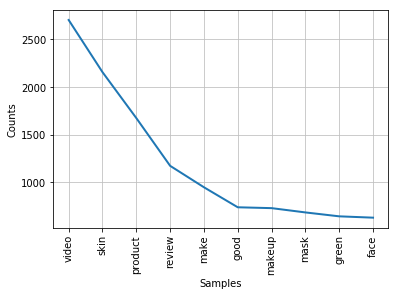

In [35]:
freq_0.plot(10)

#### Biagram 빈도 카운팅

In [36]:
print('group_0')
bigrams_0 = nltk.bigrams(corpus_0)
freq_bi_0 = nltk.FreqDist(bigrams_0)
for i,j in enumerate(freq_bi_0.most_common(20)) :
    print(f'{i}: {j}')

print('group_1')
bigrams_1 = nltk.bigrams(corpus_1)
freq_bi_1 = nltk.FreqDist(bigrams_1)
for i,j in enumerate(freq_bi_1.most_common(20)) :
    print(f'{i}: {j}')

print('group_2')
bigrams_2 = nltk.bigrams(corpus_2)
freq_bi_2 = nltk.FreqDist(bigrams_2)
for i,j in enumerate(freq_bi_2.most_common(20)) :
    print(f'{i}: {j}')

group_0
0: (('skin', 'care'), 223)
1: (('oily', 'skin'), 217)
2: (('green', 'seed'), 152)
3: (('etude', 'house'), 130)
4: (('seed', 'serum'), 129)
5: (('clay', 'mask'), 112)
6: (('sheet', 'mask'), 111)
7: (('make', 'video'), 111)
8: (('care', 'routine'), 101)
9: (('acne', 'prone'), 98)
10: (('skincare', 'routine'), 91)
11: (('bija', 'cica'), 88)
12: (('cica', 'balm'), 87)
13: (('sensitive', 'skin'), 80)
14: (('skin', 'type'), 76)
15: (('bination', 'skin'), 75)
16: (('skincare', 'product'), 72)
17: (('korean', 'skincare'), 69)
18: (('face', 'shop'), 68)
19: (('looking', 'forward'), 68)
group_1
0: (('south', 'korea'), 12)
1: (('christmas', 'gift'), 12)
2: (('vlog', 'birthday'), 12)
3: (('birthday', 'celebration'), 11)
4: (('eunice', 'mommy'), 10)
5: (('vlog', 'mommy'), 10)
6: (('mommy', 'birthday'), 10)
7: (('yoona', 'beautiful'), 9)
8: (('goddess', 'yoona'), 9)
9: (('filum', 'disruptor'), 9)
10: (('vlog', 'south'), 9)
11: (('want', 'shoe'), 9)
12: (('beautiful', 'yoona'), 8)
13: (('clay

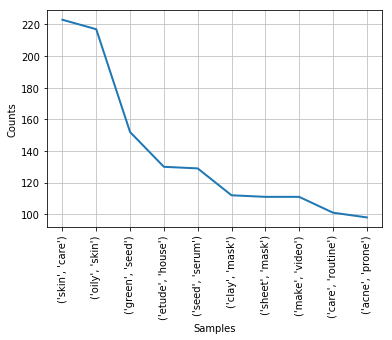

In [37]:
freq_bi_0.plot(10)

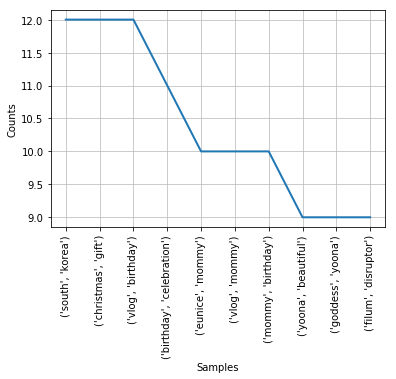

In [38]:
freq_bi_1.plot(10)

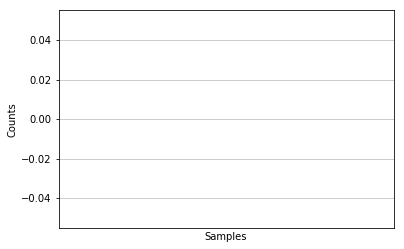

In [39]:
freq_bi_2.plot(10)

#### trigram 빈도 카운팅

In [40]:
print('group_0')
trigrams_0 = nltk.trigrams(corpus_0)
freq_tri_0 = nltk.FreqDist(trigrams_0)
for i,j in enumerate(freq_tri_0.most_common(20)) :
    print(f'{i}: {j}')

print('group_1')
trigrams_1 = nltk.trigrams(corpus_1)
freq_tri_1 = nltk.FreqDist(trigrams_1)
for i,j in enumerate(freq_tri_1.most_common(20)) :
    print(f'{i}: {j}')

print('group_2')
trigrams_2 = nltk.trigrams(corpus_2)
freq_tri_2 = nltk.FreqDist(trigrams_2)
for i,j in enumerate(freq_tri_2.most_common(20)) :
    print(f'{i}: {j}')

group_0
0: (('green', 'seed', 'serum'), 106)
1: (('bija', 'cica', 'balm'), 68)
2: (('acne', 'prone', 'skin'), 56)
3: (('skin', 'care', 'product'), 47)
4: (('skin', 'care', 'routine'), 39)
5: (('volcanic', 'clay', 'mask'), 30)
6: (('pore', 'clay', 'mask'), 30)
7: (('korean', 'skin', 'care'), 30)
8: (('volcanic', 'pore', 'clay'), 28)
9: (('ready', 'makeup', 'routine'), 26)
10: (('overnight', 'care', 'routine'), 26)
11: (('oily', 'acne', 'prone'), 25)
12: (('super', 'volcanic', 'pore'), 23)
13: (('please', 'make', 'video'), 23)
14: (('long', 'wear', 'cushion'), 19)
15: (('care', 'oily', 'skin'), 19)
16: (('super', 'volcanic', 'clay'), 18)
17: (('spending', 'time', 'family'), 17)
18: (('nosebum', 'mineral', 'powder'), 15)
19: (('special', 'care', 'oily'), 15)
group_1
0: (('vlog', 'south', 'korea'), 9)
1: (('vlog', 'birthday', 'celebration'), 9)
2: (('vlog', 'mommy', 'birthday'), 8)
3: (('want', 'eunice', 'christmas'), 5)
4: (('eunice', 'christmas', 'gift'), 5)
5: (('christmas', 'gift', 'vl

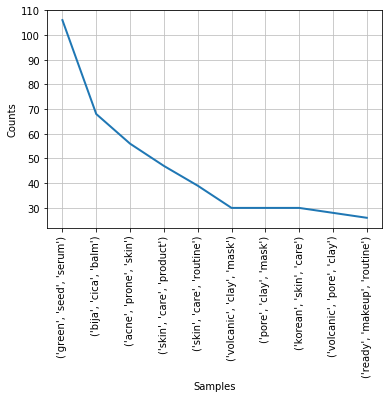

In [41]:
freq_tri_0.plot(10)

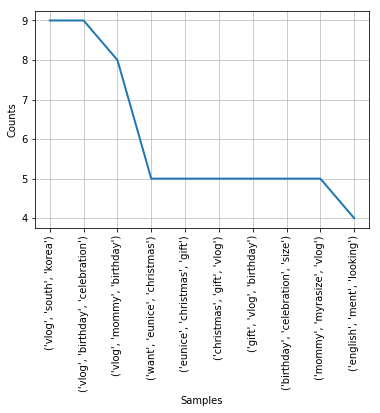

In [42]:
freq_tri_1.plot(10)

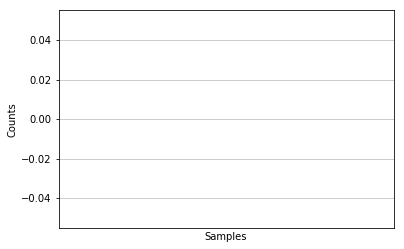

In [43]:
freq_tri_2.plot(10)

In [44]:
res = pd.Series(kmeans.labels_)
list= []
for i in range(0,3) : 
    print(cpv.values[res==i])

['g tau kenapa slalu g cocok pake produk wardah adakah yg senasib sma reviewnya selalu detail effo buat bolakbalik pake fondie thankyou reviewnya kebetulan innisfree udah mau abis dan lg peimbangin mau ganti apa ttep so far sesuka itu sih sm innisfree minyak d tzone terkontrol seharian transcluentkak ratu kualitas kontennya makin bagus ini testing produk dan ngebandingin tiga2nya dapet banget effonya kerasa banget pembuatan kontennya bener2 kayak dikerjain serius dan beneran gak cuma asal ngetes oke bangeettt jarang2 beauty youtuber kayak ginisy dr dlu marcks squad murah dan matte sehariantetep tim marcksreview aloe vera gel dong yg dari beri merek sei pemakai semua bedak yang direview di video ini termasuk pemakai marcks bener2 setuju 100 sama semua pendapat kak ratu kalau dari segi menahan minyak dan kenyamanannya di kulit innisfree no 1 selanjutnya zero sebum karena dia lbh ngeringin dari innisfree tapi karena kulit jg sensitif sama agen penyumbat pori2 kaya silica mineral oil dan t